# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [31]:
app_train['age']=app_train.loc[:,'DAYS_BIRTH']/365

In [33]:
app_train['age_group']=pd.cut(app_train['age'],bins=np.linspace(20,70,6))

In [38]:
app_train.loc[:,['age','age_group','TARGET']]

,age,age_group,TARGET
0,25.920548,"(20.0, 30.0]",1
1,45.931507,"(40.0, 50.0]",0
2,52.180822,"(50.0, 60.0]",0
3,52.068493,"(50.0, 60.0]",0
4,54.608219,"(50.0, 60.0]",0
...,...,...,...
307506,25.553425,"(20.0, 30.0]",0
307507,56.917808,"(50.0, 60.0]",0
307508,41.002740,"(40.0, 50.0]",0
307509,32.769863,"(30.0, 40.0]",1


In [40]:
app_train.groupby('age_group')['TARGET','age']

C:\Users\TanziAI\.conda\envs\newtensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,TARGET,age
age_group,,
"(20.0, 30.0]",0.114569,26.622041
"(30.0, 40.0]",0.095835,35.123197
"(40.0, 50.0]",0.076508,44.756079
"(50.0, 60.0]",0.061297,54.976575
"(60.0, 70.0]",0.049214,63.355933


In [49]:
max(app_train['AMT_INCOME_TOTAL'])

117000000.0

In [50]:
min(app_train['AMT_INCOME_TOTAL'])

25650.0

In [53]:
import seaborn as sns
plt.style.use('ggplot')

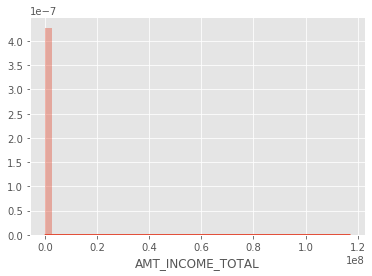

In [57]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

In [110]:
app_train['INCOME_QCUT'] = pd.qcut(app_train['AMT_INCOME_TOTAL'],10)

In [111]:
app_train.loc[:,['INCOME_QCUT','AMT_INCOME_TOTAL']]

,INCOME_QCUT,AMT_INCOME_TOTAL
0,"(180000.0, 225000.0]",202500.0
1,"(225000.0, 270000.0]",270000.0
2,"(25649.999, 81000.0]",67500.0
3,"(112500.0, 135000.0]",135000.0
4,"(112500.0, 135000.0]",121500.0
...,...,...
307506,"(147150.0, 162000.0]",157500.0
307507,"(25649.999, 81000.0]",72000.0
307508,"(147150.0, 162000.0]",153000.0
307509,"(162000.0, 180000.0]",171000.0


In [112]:
app_train['INCOME_QCUT'].unique()

[(180000.0, 225000.0], (225000.0, 270000.0], (25649.999, 81000.0], (112500.0, 135000.0], (81000.0, 99000.0], (162000.0, 180000.0], (270000.0, 117000000.0], (99000.0, 112500.0], (147150.0, 162000.0], (135000.0, 147150.0]]
Categories (10, interval[float64]): [(25649.999, 81000.0] < (81000.0, 99000.0] < (99000.0, 112500.0] < (112500.0, 135000.0] ... (162000.0, 180000.0] < (180000.0, 225000.0] < (225000.0, 270000.0] < (270000.0, 117000000.0]]

In [113]:
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

In [114]:
income_group = app_train.groupby('INCOME_QCUT')['AMT_INCOME_TOTAL','TARGET'].mean()

C:\Users\TanziAI\.conda\envs\newtensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


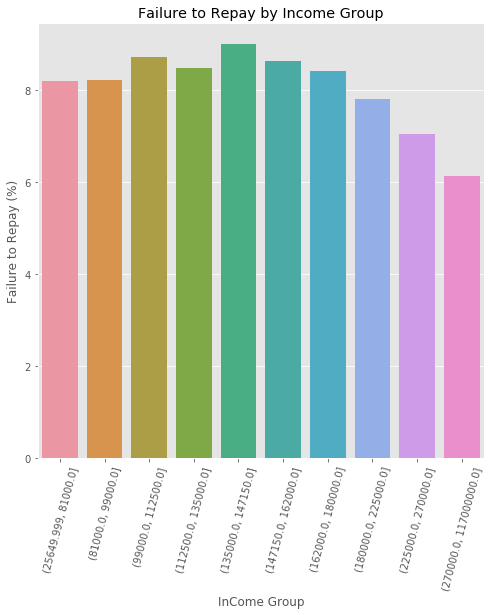

In [115]:
plt.figure(figsize = (8, 8))
px = income_group.index.astype('str')
py =100 * income_group['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('InCome Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');